In [1]:
# import preprocessing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Train = pd.read_excel("Train.xlsx") 

In [3]:
Train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Crime
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,no
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,no
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,no
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,no
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,no
...,...,...,...,...,...,...,...,...,...,...
2494,2015-04-30 14:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,INGLESIDE,NONE,SILVER AV / LISBON ST,-122.428668,37.728534,NaN
2495,2015-04-30 13:50:00,NON-CRIMINAL,"DEATH, ACCIDENTAL",Thursday,MISSION,NONE,1000 Block of POTRERO AV,-122.406539,37.756486,NaN
2496,2015-04-30 13:50:00,MISSING PERSON,MISSING ADULT,Thursday,MISSION,NONE,1000 Block of POTRERO AV,-122.406539,37.756486,NaN
2497,2015-04-30 13:50:00,MISSING PERSON,FOUND PERSON,Thursday,MISSION,NONE,1000 Block of POTRERO AV,-122.406539,37.756486,NaN


In [4]:
Test = pd.read_excel("Test.xlsx") 

In [5]:
Test

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...,...
2494,2494,2015-05-04 20:00:00,Monday,INGLESIDE,0 Block of FRANCIS ST,-122.434434,37.727039
2495,2495,2015-05-04 20:00:00,Monday,PARK,1100 Block of COLE ST,-122.449447,37.763614
2496,2496,2015-05-04 20:00:00,Monday,TARAVAL,1900 Block of 36TH AV,-122.494424,37.750622
2497,2497,2015-05-04 20:00:00,Monday,RICHMOND,GEARY BL / 15TH AV,-122.473984,37.780574


In [6]:
Train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Crime'],
      dtype='object')

In [7]:
Test.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [8]:
Train.drop(['Category', 'Descript', 'Resolution'], axis=1, inplace=True)

In [9]:
Train.columns

Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'Crime'], dtype='object')

In [10]:
Test.drop(columns = "Id", axis=1, inplace=True)

In [11]:
Test.columns

Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [12]:
Train.isna().sum()

Dates            0
DayOfWeek        0
PdDistrict       0
Address          0
X                0
Y                0
Crime         2485
dtype: int64

In [13]:
Test.isna().sum()

Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [14]:
Train.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Crime
0,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,no
1,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,no
2,2015-05-13 23:33:00,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,no
3,2015-05-13 23:30:00,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,no
4,2015-05-13 23:30:00,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,no


In [15]:
Train['Crime'][0:999]='no'

C:\Users\hp\AppData\Local\Temp\ipykernel_4552\3074434705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Crime'][0:999]='no'


In [16]:
Train['Crime'][1000:2499]='yes'

C:\Users\hp\AppData\Local\Temp\ipykernel_4552\1784881848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['Crime'][1000:2499]='yes'


In [17]:
Train['Crime'] = Train['Crime'].fillna(Train['Crime'].mode()[0])

In [18]:
Train.isna().sum()

Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
Crime         0
dtype: int64

In [19]:
# import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [20]:
Train['Crime'].value_counts()

yes    1500
no      999
Name: Crime, dtype: int64

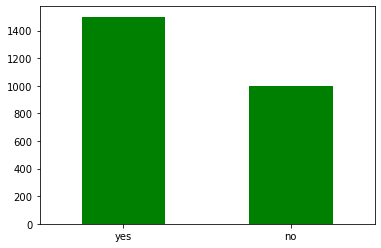

In [21]:
Train['Crime'].value_counts().plot(kind='bar', color='green')
plt.xticks(rotation=0)
plt.show()

In [22]:
le = LabelEncoder()

In [23]:
Train['Crime'] = le.fit_transform(Train['Crime'])

In [24]:
Train.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Crime
0,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
1,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
2,2015-05-13 23:33:00,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0
3,2015-05-13 23:30:00,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,2015-05-13 23:30:00,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,0


In [25]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       2499 non-null   datetime64[ns]
 1   DayOfWeek   2499 non-null   object        
 2   PdDistrict  2499 non-null   object        
 3   Address     2499 non-null   object        
 4   X           2499 non-null   float64       
 5   Y           2499 non-null   float64       
 6   Crime       2499 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 127.0+ KB


In [26]:
def preprocessing_data(data):

    
    
    # Label Encoder conversion
    data["Dates"] = le.fit_transform(data["Dates"])
    data["DayOfWeek"] = le.fit_transform(data["DayOfWeek"])
    data["PdDistrict"] = le.fit_transform(data["PdDistrict"])
    data["Address"] = le.fit_transform(data["Address"])
    
    
    return data                  

In [27]:
train = preprocessing_data(Train)

In [28]:
test = preprocessing_data(Test)

In [29]:
train

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Crime
0,1123,6,4,1436,-122.425892,37.774599,0
1,1123,6,4,1436,-122.425892,37.774599,0
2,1122,6,4,1550,-122.424363,37.800414,0
3,1121,6,4,352,-122.426995,37.800873,0
4,1121,6,5,131,-122.438738,37.771541,0
...,...,...,...,...,...,...,...
2494,1,4,2,1500,-122.428668,37.728534,1
2495,0,4,3,218,-122.406539,37.756486,1
2496,0,4,3,218,-122.406539,37.756486,1
2497,0,4,3,218,-122.406539,37.756486,1


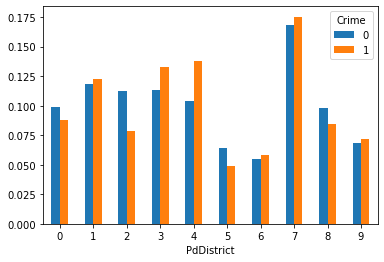

<Figure size 720x720 with 0 Axes>

In [30]:
#PdDistrict and Crime
dc=pd.crosstab(train['PdDistrict'], train['Crime'])
dc.div(dc.sum(), axis=1).plot(kind='bar', stacked=False)

plt.xticks(rotation=0)
plt.figure(figsize=(10,10))
plt.show()

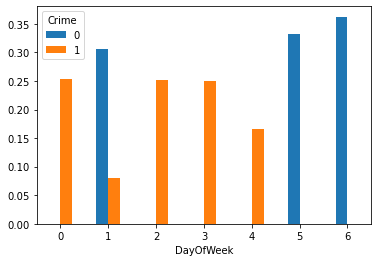

<Figure size 720x720 with 0 Axes>

In [31]:
#Daysofweek and Crime
dc=pd.crosstab(train['DayOfWeek'], train['Crime'])
dc.div(dc.sum(), axis=1).plot(kind='bar', stacked=False)

plt.xticks(rotation=0)
plt.figure(figsize=(10,10))
plt.show()

In [32]:
test

,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,1142,3,0,552,-122.399588,37.735051
1,1141,3,0,770,-122.391523,37.732432
2,1140,3,4,541,-122.426002,37.792212
3,1139,3,2,838,-122.437394,37.721412
4,1139,3,2,838,-122.437394,37.721412
...,...,...,...,...,...,...
2494,0,1,2,38,-122.434434,37.727039
2495,0,1,5,221,-122.449447,37.763614
2496,0,1,8,448,-122.494424,37.750622
2497,0,1,6,1218,-122.473984,37.780574


In [33]:
X = train.drop('Crime', axis=1)
y = train['Crime']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4442)

In [36]:
from sklearn.metrics import accuracy_score, f1_score

# using Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
random_forest = RandomForestClassifier()

In [39]:
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
random_prediction = random_forest.predict(X_test)

In [41]:
random_acc = round((accuracy_score(y_test, random_prediction) * 100), 2)
random_f1 = round((f1_score(y_test, random_prediction)), 4)

In [42]:
print(f'The Random Forest classifier has an accuracy of {random_acc}% and f1 score of {random_f1}')

The Random Forest classifier has an accuracy of 99.4% and f1 score of 0.995


# Feature importance

Feature: 0, Score: 0.68800
Feature: 1, Score: 0.29612
Feature: 2, Score: 0.00118
Feature: 3, Score: 0.00424
Feature: 4, Score: 0.00457
Feature: 5, Score: 0.00589


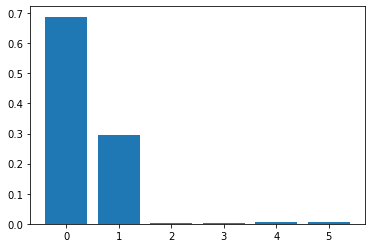

In [43]:
from matplotlib import pyplot
importance = random_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Using Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [46]:
gradient_pred = gradient_boost.predict(X_test)

In [47]:
gradient_acc = round((accuracy_score(y_test, gradient_pred)*100), 2)
gradient_f1 = round((f1_score(y_test, gradient_pred)), 4)

In [48]:
print('accuracy score: ', gradient_acc)
print('f1_score: ', gradient_f1)

accuracy score:  99.6
f1_score:  0.9967


# Using SVM

In [49]:
from sklearn.svm import SVC

In [50]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

In [51]:
svm_prediction = svm_model.predict(X_test)

In [52]:
svm_acc = round((accuracy_score(y_test, svm_prediction)* 100), 2)
svm_f1 = round((f1_score(y_test, svm_prediction)), 4)

In [53]:
print('accuracy score: ', svm_acc)
print('f1_score: ', svm_f1)

accuracy score:  97.8
f1_score:  0.9815


# Using Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
naive_model = GaussianNB()

naive_model.fit(X_train, y_train)

GaussianNB()

In [56]:
naive_prediction = naive_model.predict(X_test)

In [57]:
naive_acc = round((accuracy_score(y_test, naive_prediction)*100), 2)
naive_f1 = round((f1_score(y_test, naive_prediction)), 4)

In [58]:
print('accuracy score: ', naive_acc)
print('f1_score: ', naive_f1)

accuracy score:  95.4
f1_score:  0.9634


In [59]:
#pickle using gradient boost model

In [60]:
import pickle
filename = 'crime_predict.sav'
pickle.dump(random_forest, open(filename, 'wb'))

In [61]:
X.columns

Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [62]:
X.head

<bound method NDFrame.head of       Dates  DayOfWeek  PdDistrict  Address           X          Y
0      1123          6           4     1436 -122.425892  37.774599
1      1123          6           4     1436 -122.425892  37.774599
2      1122          6           4     1550 -122.424363  37.800414
3      1121          6           4      352 -122.426995  37.800873
4      1121          6           5      131 -122.438738  37.771541
...     ...        ...         ...      ...         ...        ...
2494      1          4           2     1500 -122.428668  37.728534
2495      0          4           3      218 -122.406539  37.756486
2496      0          4           3      218 -122.406539  37.756486
2497      0          4           3      218 -122.406539  37.756486
2498      0          4           1     1057 -122.409792  37.798508

[2499 rows x 6 columns]>

In [63]:
X['Dates'].value_counts()

663    20
32     16
540    15
82     14
373    14
       ..
830     1
454     1
453     1
452     1
561     1
Name: Dates, Length: 1124, dtype: int64

In [64]:
X['DayOfWeek'].value_counts()

1    425
0    379
2    377
3    376
6    362
5    331
4    249
Name: DayOfWeek, dtype: int64

In [65]:
X['PdDistrict'].value_counts()

7    431
3    312
4    311
1    302
0    231
2    230
8    225
9    176
6    143
5    138
Name: PdDistrict, dtype: int64

In [66]:
X['Address'].value_counts()

1072    45
364     20
1086    17
218     14
228     11
        ..
564      1
881      1
418      1
826      1
1500     1
Name: Address, Length: 1570, dtype: int64

In [67]:
X['X'].value_counts()

-122.403405    42
-122.422063    20
-122.411279    15
-122.406539    14
-122.407634     8
               ..
-122.419017     1
-122.470137     1
-122.428002     1
-122.454822     1
-122.428668     1
Name: X, Length: 1587, dtype: int64

In [68]:
X['Y'].value_counts()

37.775421    42
37.789920    20
37.771579    15
37.756486    14
37.784189     8
             ..
37.781936     1
37.724628     1
37.785385     1
37.715690     1
37.728534     1
Name: Y, Length: 1587, dtype: int64